# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 9)


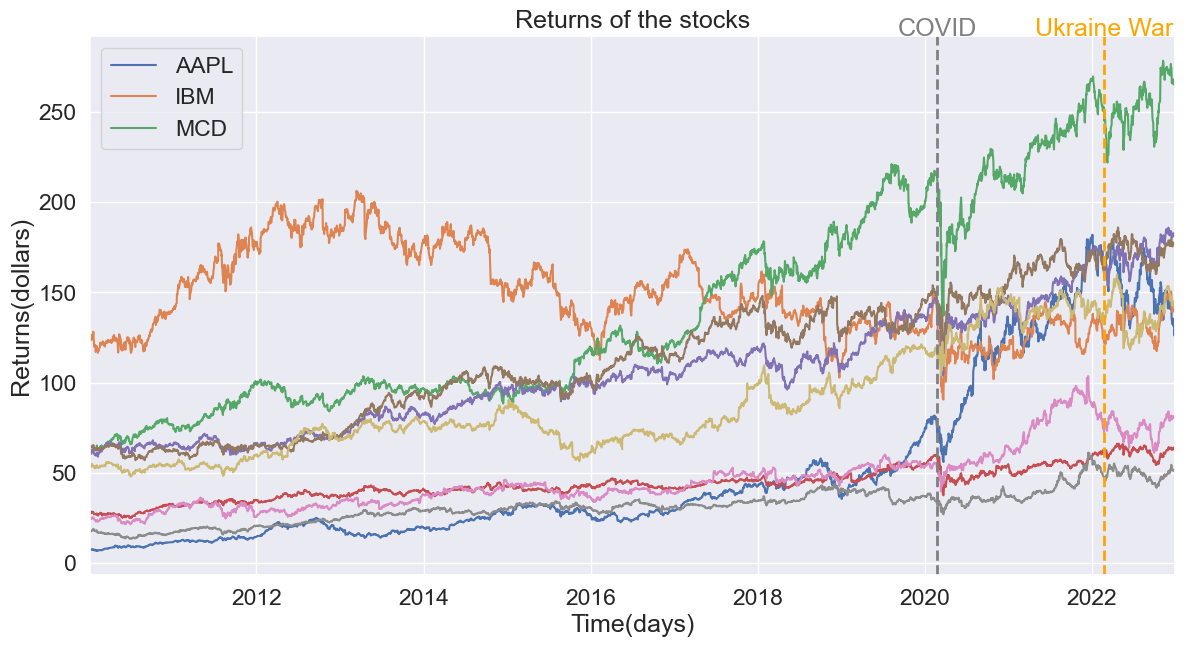

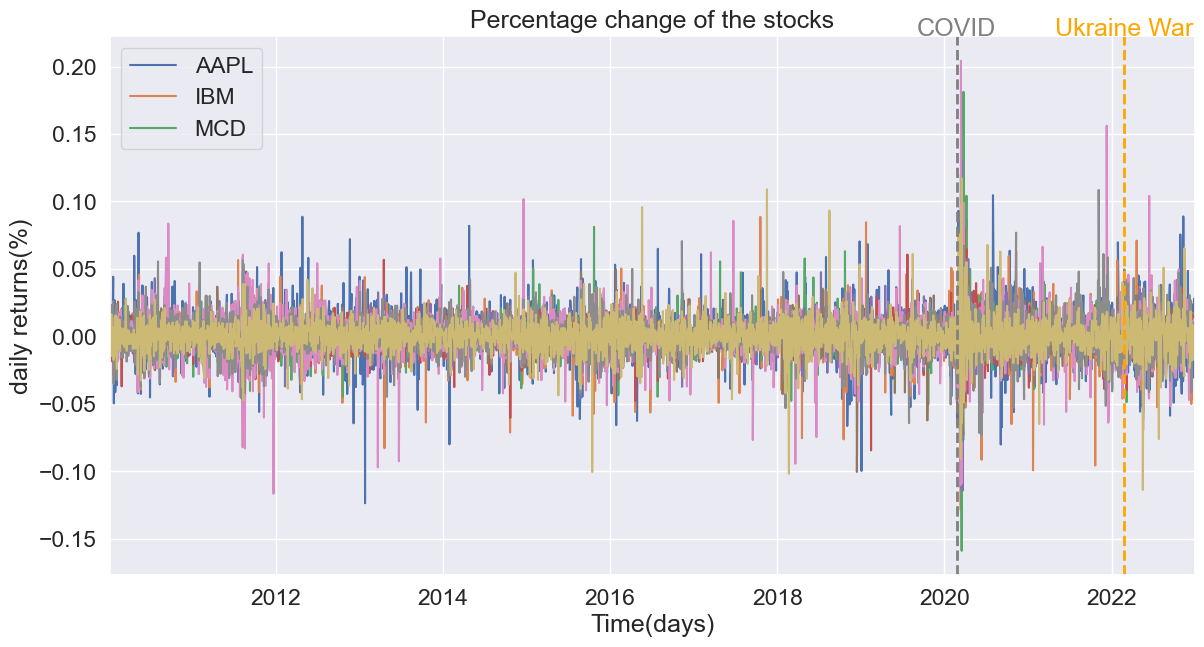

In [1]:
from cvx.covariance.ewma import iterated_ewma, _ewma_cov, _ewma_mean
from cvx.covariance.combination import from_sigmas

from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

# NOW PLOT MEAN LOGLIKELIHOOD, REGRET AND RMSE

In [ ]:
number_of_stocks = np.array([3, 6, 9])

def plot_metric_with_styles_and_colors(metric_data, title, ylabel):
    plt.figure(figsize=(14, 8))
    
    # Define a color scheme for the models
    colors = {
        'RW': 'tab:blue',
        'EWMA': 'tab:orange',
        'MGARCH': 'tab:green',
        # Assign the same color to hybrid versions
        'HYBRID_RW': 'tab:blue',
        'HYBRID_EWMA': 'tab:orange',
        'HYBRID_MGARCH': 'tab:green',
        'PRESCIENT': 'tab:red'
    }
    
    for model, values in metric_data.items():
        linestyle = '--' if 'HYBRID' in model else '-'  # Dashed for hybrid, solid for others
        color = colors[model]  # Get the color for the model
        plt.plot(number_of_stocks, values, marker='o', label=model, linestyle=linestyle, color=color)
    
    # Adjust the y-axis scale
    y_values = [value for values in metric_data.values() for value in values if value]  # Ensure non-empty values
    if y_values:  # Check if y_values is not empty
        y_min, y_max = min(y_values), max(y_values)
        y_buffer = (y_max - y_min) * 0.1  # Adding 10% of the range as a buffer
        plt.ylim([y_min - y_buffer, y_max + y_buffer])

    plt.title(title)
    plt.xlabel('Number of Stocks Considered')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

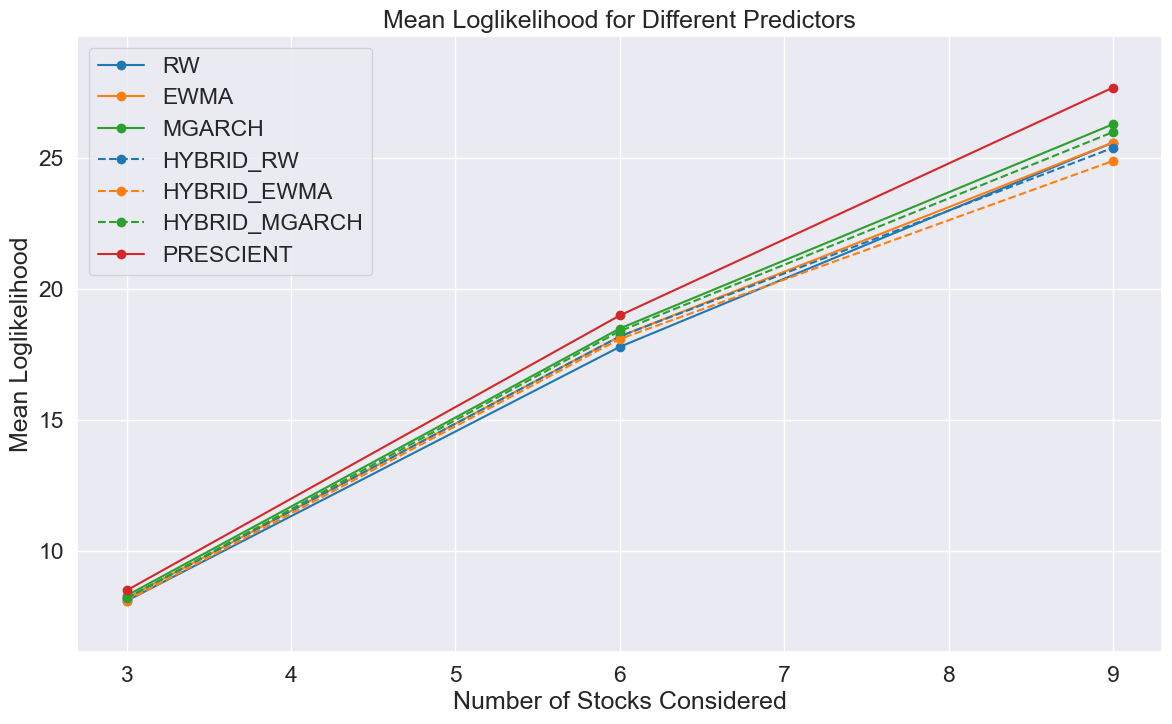

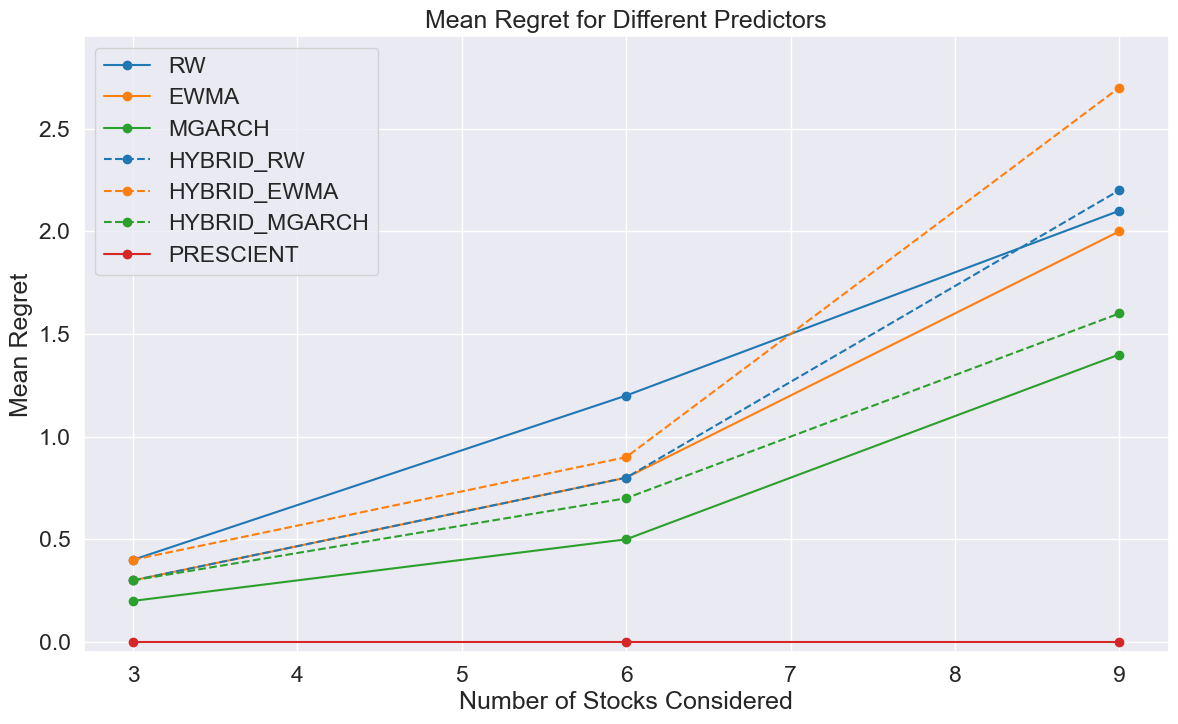

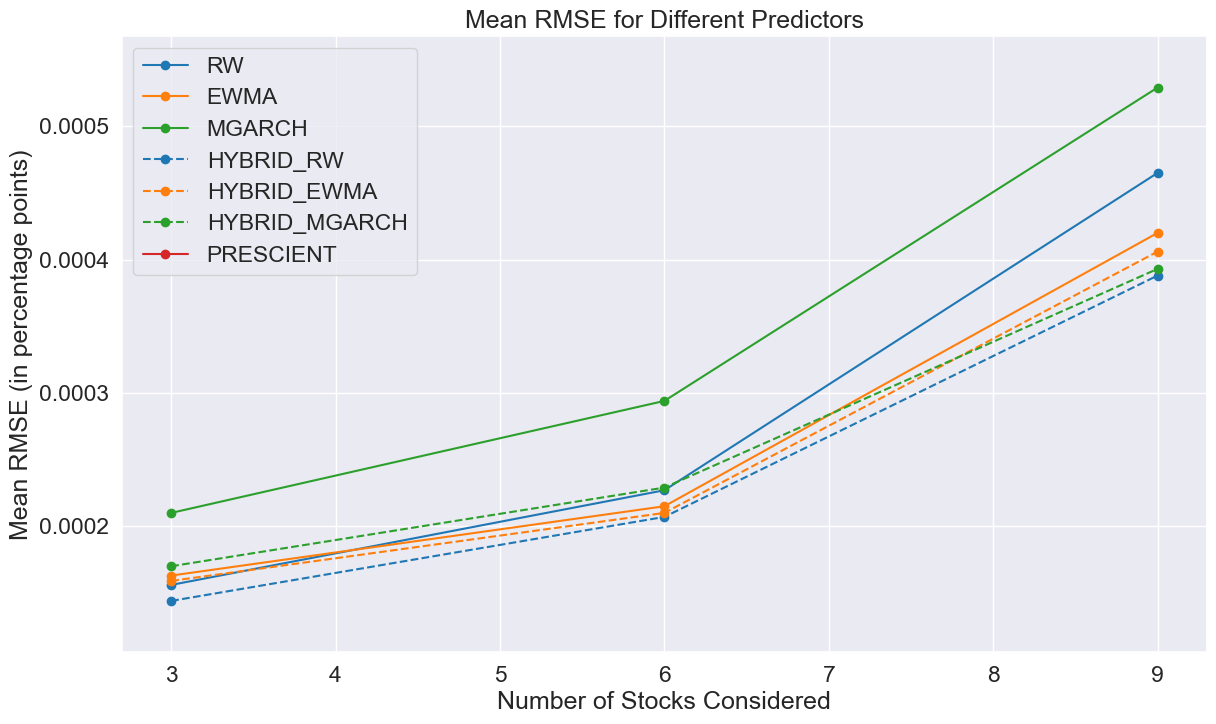

In [4]:
# Mean Loglikelihood
mean_loglikelihood = {
    'RW': [8.1, 17.8, 25.6],
    'EWMA': [8.2, 18.2, 25.6],
    'MGARCH': [8.3, 18.5, 26.3],
    'HYBRID_RW': [8.2, 18.2, 25.4],
    'HYBRID_EWMA': [8.1, 18.1, 24.9],
    'HYBRID_MGARCH': [8.2, 18.4, 26],
    'PRESCIENT': [8.5, 19, 27.7]
}

# Mean Regret
mean_regret = {
    'RW': [0.4, 1.2, 2.1],
    'EWMA': [0.3, 0.8, 2],
    'MGARCH': [0.2, 0.5, 1.4],
    'HYBRID_RW': [0.3, 0.8, 2.2],
    'HYBRID_EWMA': [0.4, 0.9, 2.7],
    'HYBRID_MGARCH': [0.3, 0.7, 1.6],
    'PRESCIENT': [0, 0, 0]
}

# Mean RMSE
mean_rmse = {
    'RW': [0.000156, 0.000227, 0.000465],
    'EWMA': [0.000163, 0.000215, 0.000420],
    'MGARCH': [0.000210, 0.000294, 0.000529],
    'HYBRID_RW': [0.000144, 0.000207, 0.000388],
    'HYBRID_EWMA': [0.000159, 0.000210, 0.000406],
    'HYBRID_MGARCH': [0.000170, 0.000229, 0.000393],
    'PRESCIENT': [0, 0, 0]
}

# Plotting the improved charts for Mean Loglikelihood, Mean Regret, and Mean RMSE
plot_metric_with_styles_and_colors(mean_loglikelihood, 'Mean Loglikelihood for Different Predictors', 'Mean Loglikelihood')
plot_metric_with_styles_and_colors(mean_regret, 'Mean Regret for Different Predictors', 'Mean Regret')
plot_metric_with_styles_and_colors(mean_rmse, 'Mean RMSE for Different Predictors', 'Mean RMSE (in percentage points)')




Now we want to have a fair comparison, so i measure the rmse between the real and the predicted volatility of apple, ibm and mcd in the case of 3, 6 and 9 assets. then i plot 3 charts with the rmse performance.

In [3]:
mean_rmse_aapl = {
    'RW': [0.002519, 0.002519, 0.002922],
    'EWMA': [0.002420, 0.002406, 0.002560],
    'MGARCH': [0.003044, 0.003044, 0.00332],
    'HYBRID_RW': [0.002240, 0.002300, 0.002321],
    'HYBRID_EWMA': [0.002304, 0.002255, 0.002272],
    'HYBRID_MGARCH': [0.002507, 0.002391, 0.002507],
    'PRESCIENT': [0, 0, 0]
}

mean_rmse_ibm = {
    'RW': [0.001635, 0.001635, 0.001507],
    'EWMA': [0.002087, 0.001537, 0.001499],
    'MGARCH': [0.002863, 0.002863, 0.002904],
    'HYBRID_RW': [0.001410, 0.001343, 0.001340 ],
    'HYBRID_EWMA': [0.002010, 0.001633, 0.001871],
    'HYBRID_MGARCH': [0.001981, 0.001949, 0.001981],
    'PRESCIENT': [0, 0, 0]
}

mean_rmse_mcd = {
    'RW': [0.001298, 0.001298, 0.001533],
    'EWMA': [0.001514, 0.001252, 0.001261],
    'MGARCH': [0.001344, 0.001339, 0.002215],
    'HYBRID_RW': [0.001434, 0.001417, 0.001423],
    'HYBRID_EWMA': [0.001451, 0.001352, 0.001401],
    'HYBRID_MGARCH': [0.001617, 0.001267, 0.001617],
    'PRESCIENT': [0, 0, 0]
}

# Plotting the improved charts for Mean Loglikelihood, Mean Regret, and Mean RMSE
plot_metric_with_styles_and_colors(mean_rmse_aapl, 'Mean RMSE for Different Predictors', 'AAPL Mean RMSE (in percentage points)')
plot_metric_with_styles_and_colors(mean_rmse_ibm, 'Mean RMSE for Different Predictors', 'IBM Mean RMSE (in percentage points)')
plot_metric_with_styles_and_colors(mean_rmse_mcd, 'Mean RMSE for Different Predictors', 'MCD Mean RMSE (in percentage points)')

SyntaxError: invalid syntax (1736396612.py, line 2)